In [78]:
#Import pandas so we can import our large cleaned data set, then we need to import the cleaned churn file provided to us by this course
#Jupyter Lab 3.44, Python 3
import pandas as pd
churn_df = pd.read_csv(r'C:\Users\seans\Documents\WGU\D208\churn_clean.csv')

#Import Other Packages, these packages allow us to perform statistical analysis and plot visuals for our data set
import numpy as np
import scipy as sp
import scipy.stats as stats
import pylab
from statsmodels.formula.api import logit
import statistics
from scipy import stats
from statsmodels.formula.api import ols
import statistics
import matplotlib as mpl
import matplotlib.pyplot as mpl
import seaborn as sb
# Scikit
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [79]:
#Let's view the dataset
#View Data Types
print(churn_df.select_dtypes(include="float").info())
print(churn_df.select_dtypes(include="integer").info())
print(churn_df.select_dtypes(include="object").info())

#View exaample of the information in the dataset
print (churn_df.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Income              10000 non-null  float64
 3   Outage_sec_perweek  10000 non-null  float64
 4   Tenure              10000 non-null  float64
 5   MonthlyCharge       10000 non-null  float64
 6   Bandwidth_GB_Year   10000 non-null  float64
dtypes: float64(7)
memory usage: 547.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   CaseOrder             10000 non-null  int64
 1   Zip                   10000 non-null  int64
 2   Population            10000 non-null  int64
 3   Children              10000 non-null  int64
 4 

In [80]:
#Rename the header for items 1-8 to show a better description according to the data dictionary because the eight survey items were not labeled properly and need to fixed
churn_df.rename(columns = 
{'Item1':'item1_responses',
'Item2':'item2_fixes',
'Item3':'item3_replacements',
'Item4':'item4_reliability',
'Item5':'item5_options',
'Item6':'item6_respectfulness',
'Item7':'item7_courteous',
'Item8':'item8_listening'},
inplace=True)

In [81]:
#Check for any missing values
churn_df.isna().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [82]:
#Replace categorical values to numeric values
churn_df['Churn_numeric'] = churn_df['Churn']
dict_Churn = {"Churn_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Churn, inplace=True)

churn_df['Area_numeric'] = churn_df['Area']
dict_Area = {"Area_numeric": {"Urban": 0, "Suburban": 1, "Rural": 2}}
churn_df.replace(dict_Area, inplace=True)

churn_df['Marital_numeric'] = churn_df['Marital']
dict_Marital = {"Marital_numeric": {"Widowed": 0, "Married": 1, "Separated": 2, "Never Married": 3, "Divorced": 4}}
churn_df.replace(dict_Marital, inplace=True)

churn_df['Gender_numeric'] = churn_df['Gender']
dict_Gender = {"Gender_numeric": {"Male": 0, "Female": 1, "Prefer not to answer": 2, "Nonbinary": 3}}
churn_df.replace(dict_Gender, inplace=True)

churn_df['Contract_numeric'] = churn_df['Contract']
dict_Contract = {"Contract_numeric": {"One year": 0, "Month-to-month": 1, "Two Year": 2}}
churn_df.replace(dict_Contract, inplace=True)

churn_df['PaymentMethod_numeric'] = churn_df['PaymentMethod']
dict_PaymentMethod = {"PaymentMethod_numeric": {"Credit Card (automatic)": 0, "Bank Transfer(automatic)": 1, "Mailed Check": 2, "Electronic Check": 3}}
churn_df.replace(dict_PaymentMethod, inplace=True)

churn_df['InternetService_numeric'] = churn_df['InternetService']
dict_InternetService = {"InternetService_numeric": {"Fiber Optic": 0, "DSL": 1, "None": 2}}
churn_df.replace(dict_InternetService, inplace=True)

churn_df['Techie_numeric'] = churn_df['Techie']
dict_Techie = {"Techie_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Techie, inplace=True)

churn_df['Port_modem_numeric'] = churn_df['Port_modem']
dict_Port_modem = {"Port_modem_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Port_modem, inplace=True)

churn_df['Tablet_numeric'] = churn_df['Tablet']
dict_Tablet = {"Tablet_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Tablet, inplace=True)

churn_df['Phone_numeric'] = churn_df['Phone']
dict_Phone = {"Phone_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Phone, inplace=True)

churn_df['Multiple_numeric'] = churn_df['Multiple']
dict_Multiple = {"Multiple_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Multiple, inplace=True)

churn_df['OnlineSecurity_numeric'] = churn_df['OnlineSecurity']
dict_OnlineSecurity = {"OnlineSecurity_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_OnlineSecurity, inplace=True)

churn_df['OnlineBackup_numeric'] = churn_df['OnlineBackup']
dict_OnlineBackup = {"OnlineBackup_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_OnlineBackup, inplace=True)

churn_df['DeviceProtection_numeric'] = churn_df['DeviceProtection']
dict_DeviceProtection = {"DeviceProtection_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_DeviceProtection, inplace=True)

churn_df['TechSupport_numeric'] = churn_df['TechSupport']
dict_TechSupport = {"TechSupport_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_TechSupport, inplace=True)

churn_df['StreamingTV_numeric'] = churn_df['StreamingTV']
dict_StreamingTV = {"StreamingTV_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_StreamingTV, inplace=True)

churn_df['Churn_numeric'] = churn_df['Churn']
dict_Churn = {"Churn_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Churn, inplace=True)

churn_df['StreamingMovies_numeric'] = churn_df['StreamingMovies']
dict_StreamingMovies = {"StreamingMovies_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_StreamingMovies, inplace=True)

churn_df['PaperlessBilling_numeric'] = churn_df['PaperlessBilling']
dict_PaperlessBilling = {"PaperlessBilling_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_PaperlessBilling, inplace=True)

In [83]:
#Mean Values in the Distribution
print (churn_df.mean())
#Median Values in the Distribution)
print (churn_df.median())

CaseOrder                    5000.500000
Zip                         49153.319600
Lat                            38.757567
Lng                           -90.782536
Population                   9756.562400
Children                        2.087700
Age                            53.078400
Income                      39806.926771
Outage_sec_perweek             10.001848
Email                          12.016000
Contacts                        0.994200
Yearly_equip_failure            0.398000
Tenure                         34.526188
MonthlyCharge                 172.624816
Bandwidth_GB_Year            3392.341550
item1_responses                 3.490800
item2_fixes                     3.505100
item3_replacements              3.487000
item4_reliability               3.497500
item5_options                   3.492900
item6_respectfulness            3.497300
item7_courteous                 3.509500
item8_listening                 3.495600
Churn_numeric                   0.735000
Area_numeric    

C:\Users\seans\AppData\Local\Temp\ipykernel_3116\2705325109.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print (churn_df.mean())
C:\Users\seans\AppData\Local\Temp\ipykernel_3116\2705325109.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print (churn_df.median())


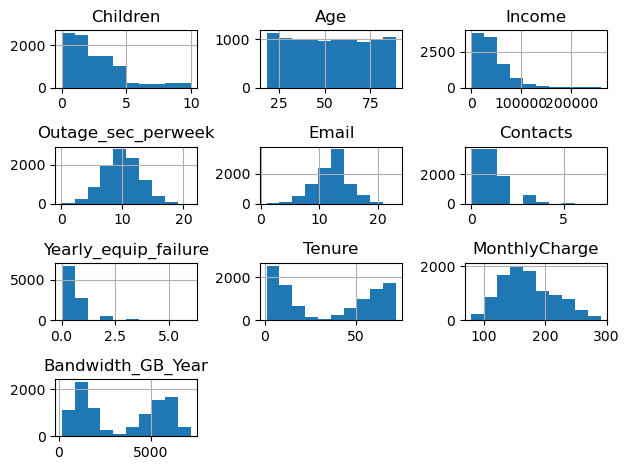

In [84]:
#Create Histograms to view our continuous variables
churn_df[['Children', 
          'Age' , 
          'Income' , 
          'Outage_sec_perweek' , 
          'Email' , 
          'Contacts' , 
          'Yearly_equip_failure' , 
          'Tenure' , 'MonthlyCharge' , 'Bandwidth_GB_Year']].hist()
mpl.savefig('churn_hists.jpg')
mpl.tight_layout()

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


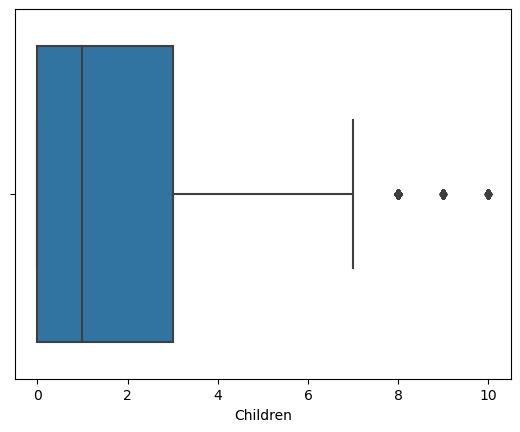

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


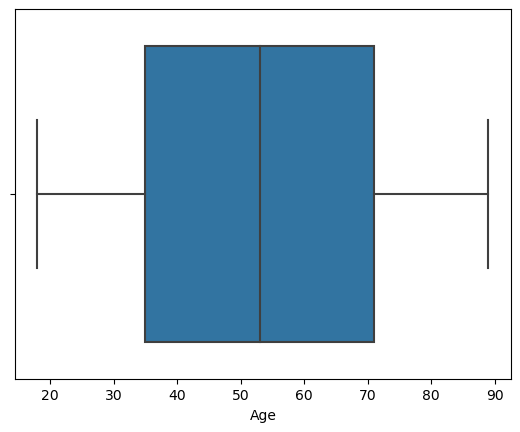

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


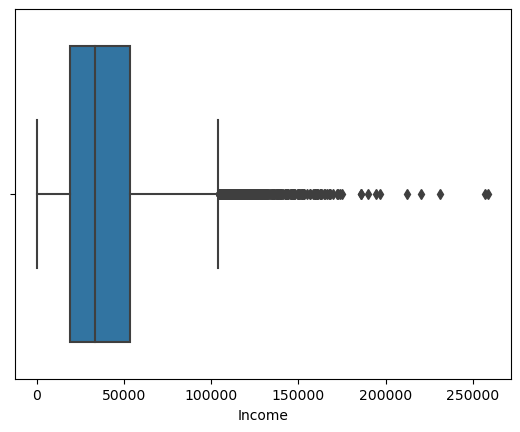

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


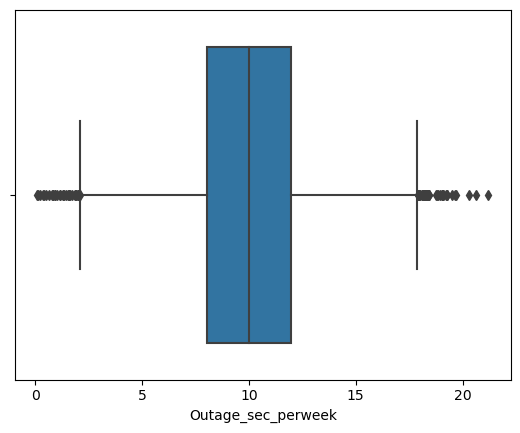

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


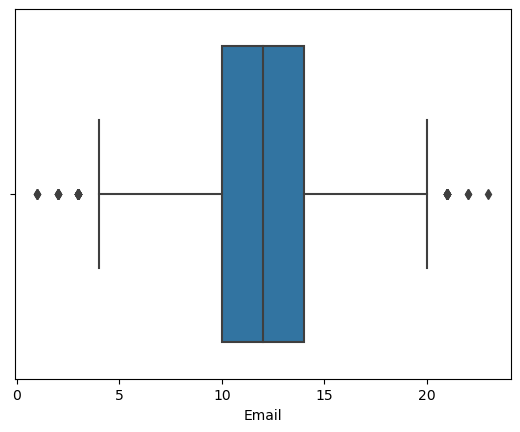

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


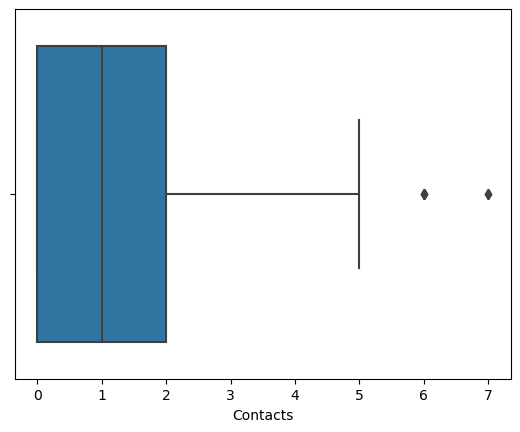

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


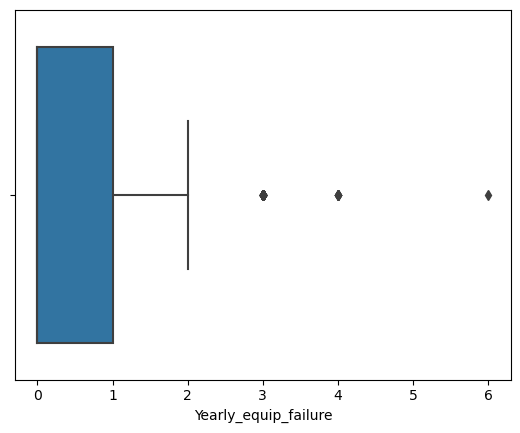

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


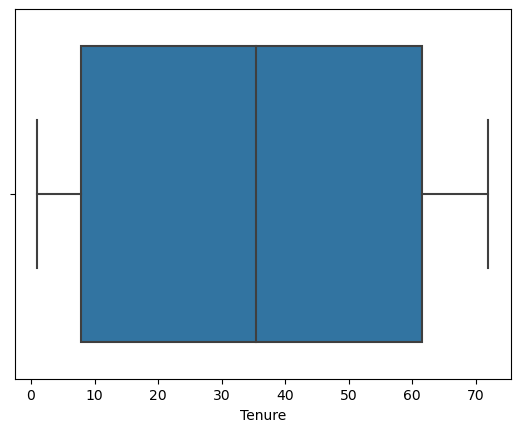

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


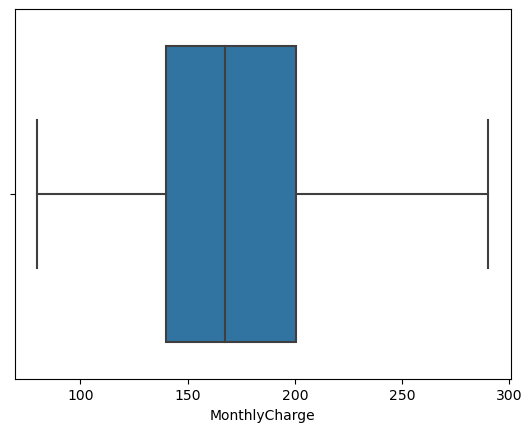

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


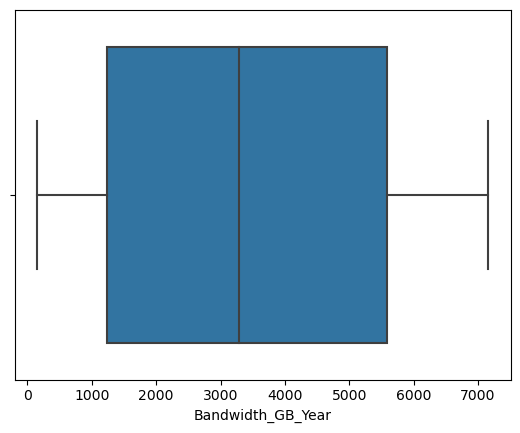

In [85]:
#Create Boxplots for our continuous variables
sb.boxplot('Children' , data = churn_df)
mpl.show()

sb.boxplot('Age' , data = churn_df)
mpl.show()

sb.boxplot('Income' , data = churn_df)
mpl.show()

sb.boxplot('Outage_sec_perweek' , data = churn_df)
mpl.show()

sb.boxplot('Email' , data = churn_df)
mpl.show()

sb.boxplot('Contacts' , data = churn_df)
mpl.show()

sb.boxplot('Yearly_equip_failure' , data = churn_df)
mpl.show()

sb.boxplot('Tenure' , data = churn_df)
mpl.show()

sb.boxplot('MonthlyCharge' , data = churn_df)
mpl.show()

sb.boxplot('Bandwidth_GB_Year' , data = churn_df)
mpl.show()

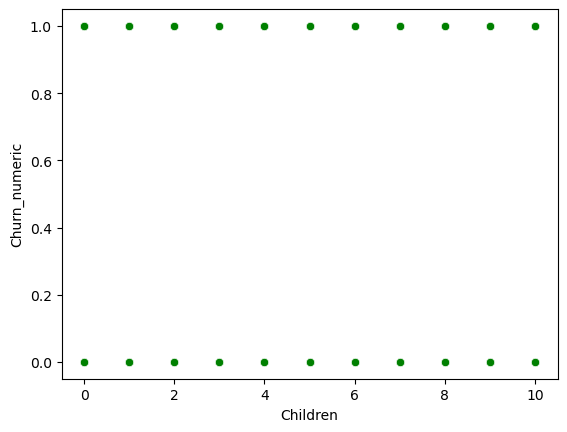

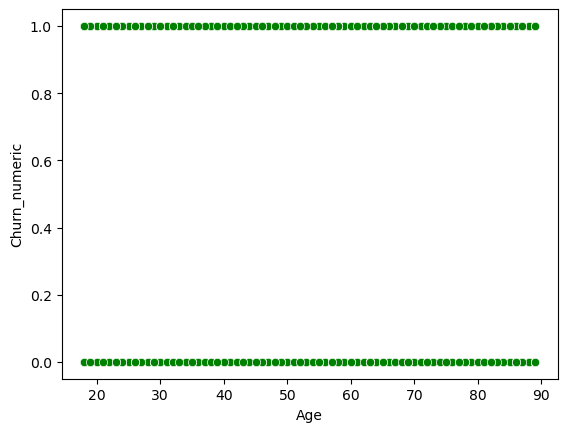

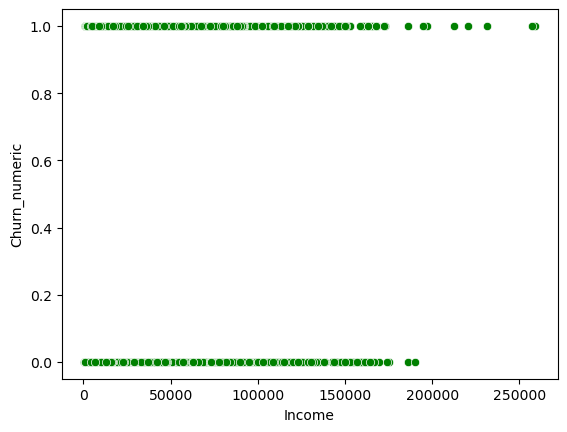

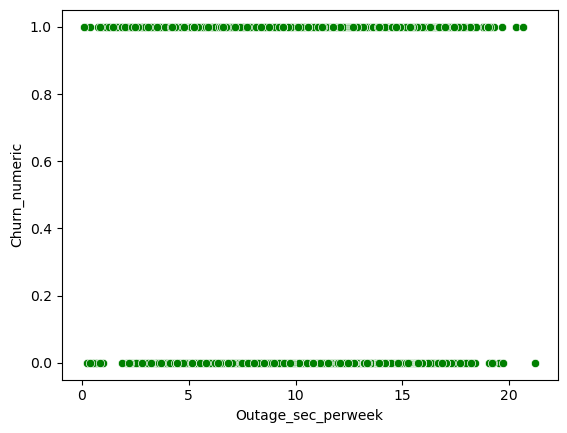

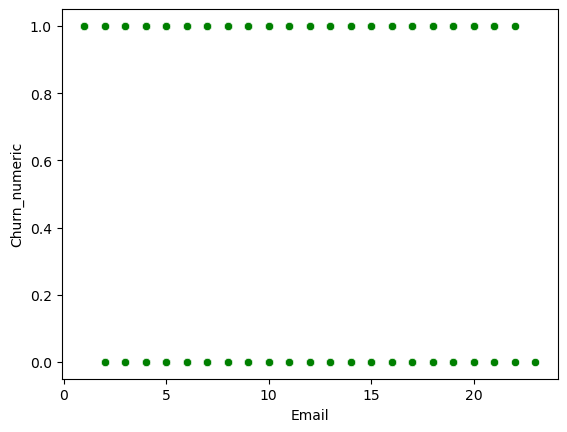

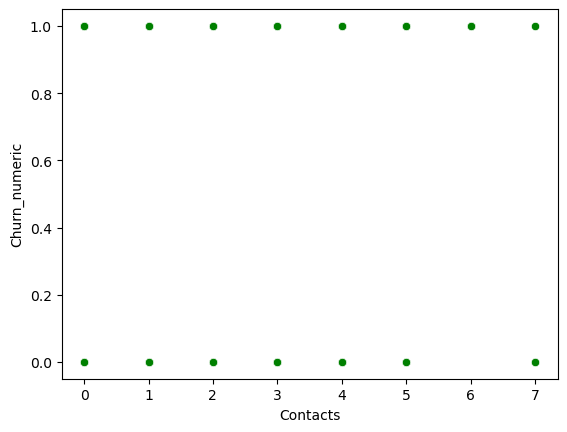

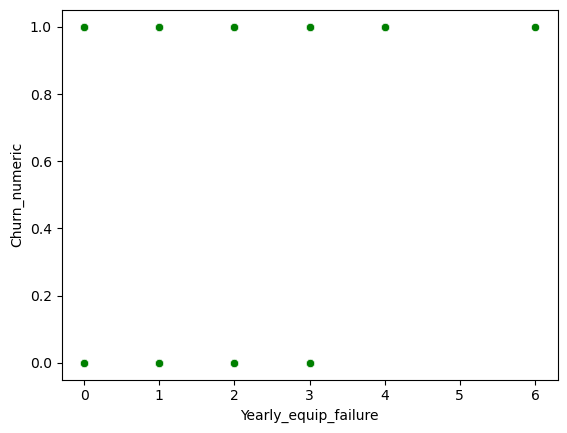

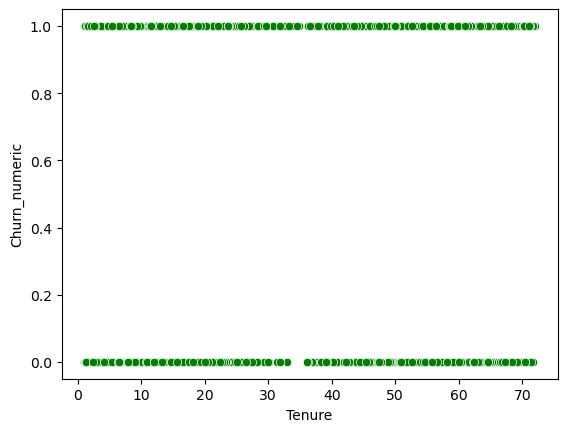

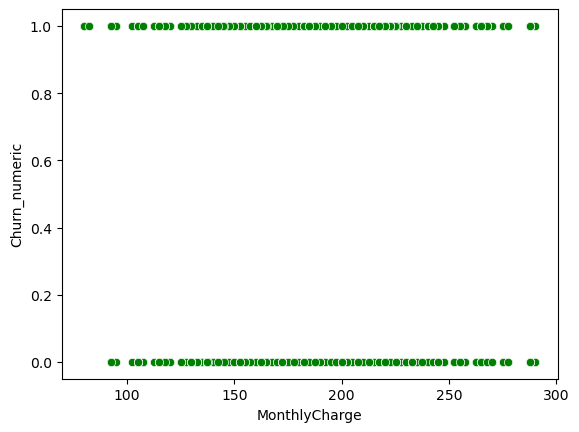

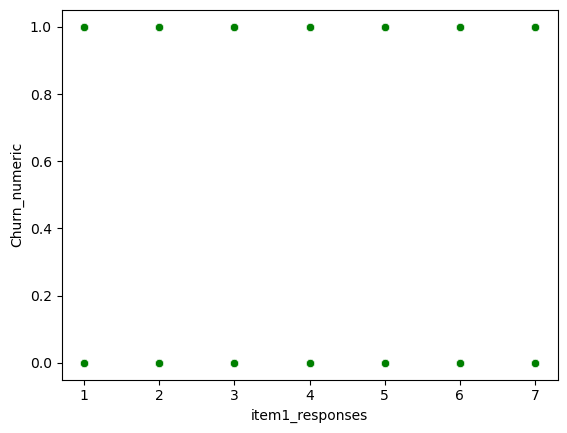

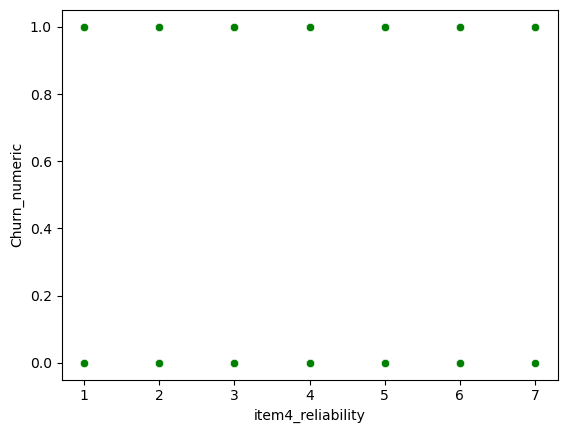

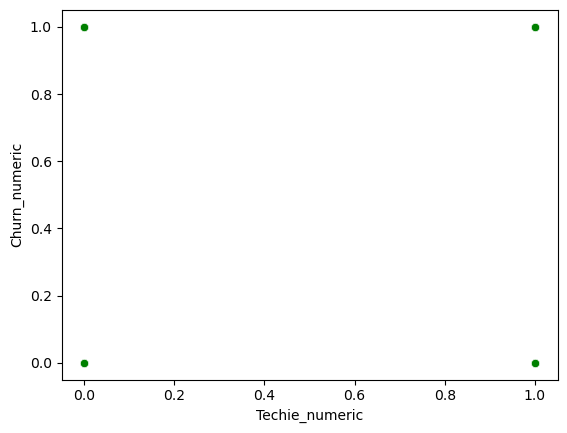

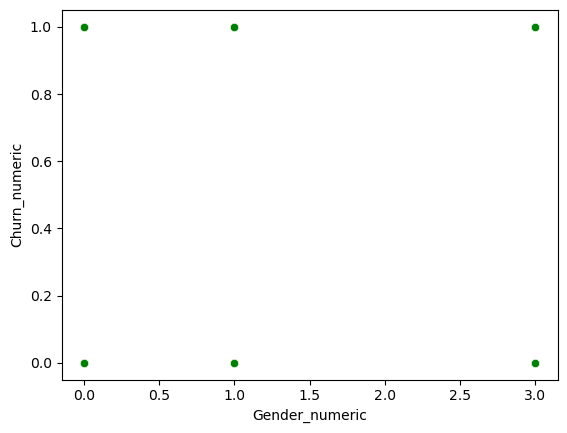

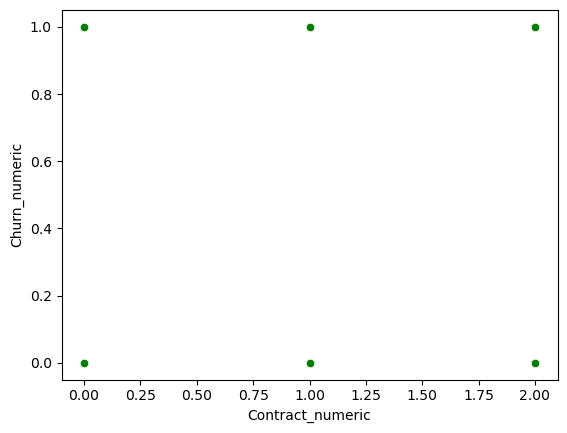

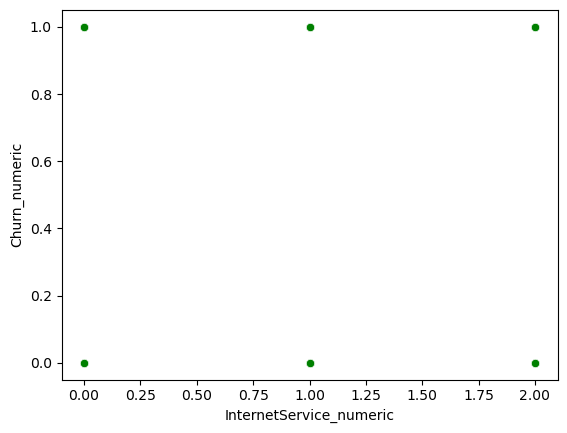

In [86]:
# Run Scatterplots to show direct or inverse relationships between the target & independent variables
sb.scatterplot(x=churn_df['Children'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Age'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()

sb.scatterplot(x=churn_df['Income'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Outage_sec_perweek'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Email'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Contacts'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Yearly_equip_failure'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Tenure'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['MonthlyCharge'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['item1_responses'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['item4_reliability'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Techie_numeric'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Gender_numeric'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Contract_numeric'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['InternetService_numeric'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()

In [87]:
# Drop original categorical variables from dataframe
churn_df = churn_df.drop(columns=['Gender' ,
                                  'Marital',
                                  'Area',
                                  'Contract',
                                  'PaymentMethod',
                                  'Churn' , 
                                  'Techie' , 
                                  'Contract' ,       
                                  'Port_modem' , 
                                  'Tablet' ,
                                  'InternetService' , 
                                  'Phone' , 
                                  'Multiple' ,
                                  'OnlineSecurity' ,
                                  'OnlineBackup', 
                                  'DeviceProtection' ,
                                  'TechSupport' ,
                                  'StreamingTV', 
                                  'StreamingMovies',
                                  'PaperlessBilling'])

In [88]:
# Remove Demographic information not changed to numeric or used in our model
churn_df = churn_df.drop(columns=['CaseOrder' ,
                               'Customer_id' ,
                               'Interaction' ,
                               'UID' ,
                               'City' ,
                               'State' ,
                               'County' ,
                               'Zip' ,
                               'Lat' ,
                               'Lng' ,
                               'Population' ,
                               'TimeZone' ,
                               'Job'
                               ])

In [89]:
# Extract Clean dataset
churn_df.to_csv('churn_Task2.csv')

In [90]:
Churn_logit_model = logit("Churn_numeric ~ Children + Age + Income + Outage_sec_perweek + Email + Contacts + Yearly_equip_failure + Bandwidth_GB_Year + MonthlyCharge + item1_responses + item2_fixes + item3_replacements + item4_reliability + item5_options + item6_respectfulness + item7_courteous + item8_listening + Tenure + Techie_numeric + Port_modem_numeric + Tablet_numeric + Phone_numeric + Multiple_numeric + OnlineSecurity_numeric + OnlineBackup_numeric + DeviceProtection_numeric + TechSupport_numeric + StreamingTV_numeric + StreamingMovies_numeric + PaperlessBilling_numeric + InternetService_numeric + Contract_numeric + Gender_numeric", data=churn_df).fit()
print(Churn_logit_model.params)
print(Churn_logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.303048
         Iterations 8
Intercept                   3.504301e+00
Children                    8.012789e-02
Age                        -1.042392e-02
Income                     -5.988466e-07
Outage_sec_perweek          2.370309e-03
Email                       7.550732e-04
Contacts                   -2.838988e-02
Yearly_equip_failure        3.481197e-02
Bandwidth_GB_Year          -2.411986e-03
MonthlyCharge              -2.182571e-02
item1_responses             9.495239e-03
item2_fixes                -5.104751e-03
item3_replacements          1.171219e-02
item4_reliability           3.396220e-02
item5_options               3.862956e-02
item6_respectfulness        1.650727e-02
item7_courteous             1.573994e-02
item8_listening             2.267211e-03
Tenure                      2.823891e-01
Techie_numeric              7.302896e-01
Port_modem_numeric          1.200425e-01
Tablet_numeric             -5.718566e

In [91]:
#Stepwise Backwards reduction with a P value cutoff of p > .05 from the regression models and p values in the output above ^
#After removing all variables with a P value > .05, the next VIF is done with the remainning variables

In [92]:
#Now we will use VIF to reduce our model. We have For the output, any VIF above 3 should be removed from the model due to an unreliable p score. Usually, it is anything above 5 with room for interpretation, but we need a stricter cutoff, so 3 was chosen.
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Churn_numeric ~ Children + Age + Bandwidth_GB_Year + MonthlyCharge + Tenure + Techie_numeric + Phone_numeric + OnlineSecurity_numeric + DeviceProtection_numeric + StreamingTV_numeric + StreamingMovies_numeric +  InternetService_numeric + Contract_numeric', data = churn_df, return_type='dataframe')

#calculate VIF for each explanatory variable
VIF = pd.DataFrame()
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['variable'] = X.columns

#view VIF for each explanatory variable 
VIF

,VIF,variable
0,146.037288,Intercept
1,1.107329,Children
2,1.118770,Age
3,118.564331,Bandwidth_GB_Year
4,3.885663,MonthlyCharge
5,117.843491,Tenure
6,1.001073,Techie_numeric
7,1.001409,Phone_numeric
8,1.035909,OnlineSecurity_numeric
9,1.102843,DeviceProtection_numeric


In [93]:
Churn_logit_model = logit("Churn_numeric ~ Children + Age + Techie_numeric + Phone_numeric + OnlineSecurity_numeric + DeviceProtection_numeric +  StreamingTV_numeric + StreamingMovies_numeric +  InternetService_numeric + Contract_numeric", data=churn_df).fit()
print(Churn_logit_model.params)
print(Churn_logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.500103
         Iterations 6
Intercept                  -0.635203
Children                    0.004219
Age                        -0.000223
Techie_numeric              0.439192
Phone_numeric              -0.179682
OnlineSecurity_numeric     -0.093453
DeviceProtection_numeric    0.259570
StreamingTV_numeric         1.212397
StreamingMovies_numeric     1.505179
InternetService_numeric    -0.061330
Contract_numeric            0.095838
dtype: float64
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Tue, 31 Jan 2023   Pseudo R-squ.:                  0.1351
Time:                        16:35:48   Log-Likelihood:                -5001.0
co

Confusion Matrix
[[1169    0]
 [ 831    0]]
Accuracy: 58.91 %
Standard Deviation: 0.06 %
Clasification Report
              precision    recall  f1-score   support

           0       0.58      1.00      0.74      1169
           1       0.00      0.00      0.00       831

    accuracy                           0.58      2000
   macro avg       0.29      0.50      0.37      2000
weighted avg       0.34      0.58      0.43      2000



C:\Users\seans\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\seans\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\seans\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


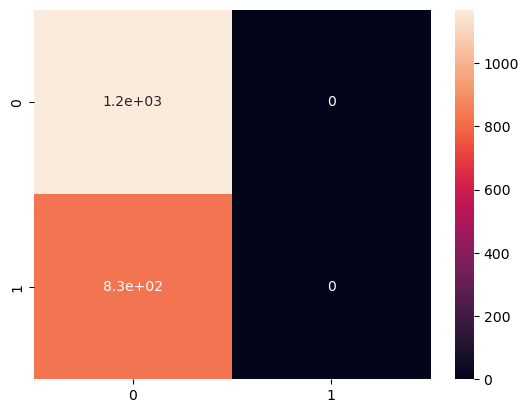

In [94]:
# Confusion Matrix
# Import the prepared dataset and assign variables X and y
ds = pd.read_csv('churn_Task2.csv')
X = ds.iloc[:, 1:-1].values
y = ds.iloc[:, -1].values

#Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Training the Logistic Regression model on the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#Predict the Test set results
y_predict = classifier.predict(X_test)

#Make and view the Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
print('Confusion Matrix')
print(cm)

#Check accuracy and standard deviation
from sklearn.model_selection import cross_val_score
35
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


y_predict_test = classifier.predict(X_test)
cm2 = confusion_matrix(y_test, y_predict_test)
sb.heatmap(cm2, annot=True)

# Classification Report
print('Clasification Report')
print(classification_report(y_test, y_predict_test))